In [1]:
import os
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import _gradient_boosting
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions_pipe_testing import *
from sklearn.metrics import  f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import *
from sklearn.preprocessing import LabelEncoder
from helper_functions_KP import *
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

In [2]:
#Editable Variables
multi_files=True #set to false if you just want to set one  prot_abund_file
in_dir="Input_data/Proteomic data/Abundance2/"
prot_abund_file='Input_data/Proteomic data/Abundance2/Norm_Intensity _all20230403.xlsx'
NP_filepath='Input_data/NPs/NP_Database.xlsx'
controls_file='Input_data/Proteomic data/controls_combined.xlsx'
uniprot_filepath='Input_data/BioPython_data/Combined_biopyCalcs.xlsx'
NSPfilePath='Input_data/NetSurfP_data/Combined.xlsx'
model=RandomForestRegressor(n_estimators=150)
# take files in_dir and combine then into one pandas df (raw_MS_data) ###USE when combining multiple datasets####
files = os.listdir(in_dir)
print(files)
if multi_files == True:
    for i,f in enumerate(files):
        print(i)
        if i==0:
            raw_MS_data=pd.read_excel(in_dir+f,header=0)
            # print(raw_MS_data)
            raw_MS_data = pd.melt(raw_MS_data, id_vars=['Entry'],var_name='Sample_num', value_name='Abundance')
            print('BALF',raw_MS_data.shape)
        else:
            print(i)
            temp = pd.read_excel(in_dir+f,header=0)
            temp = pd.melt(temp, id_vars=['Entry'],var_name='Sample_num', value_name='Abundance')
            print('Bovine',temp.shape)
            # print(temp)
            # print(temp)
            raw_MS_data2=pd.concat([raw_MS_data,temp])
            print('merge',raw_MS_data2.shape)
            # print('did it')
else:
    raw_MS_data2=pd.read_excel(prot_abund_file,header=0)
# raw_MS_data2
# melt the df to make it an accession number, NPUNID, Abundance dataset
# raw_MS_data = pd.melt(raw_MS_data, id_vars=['Entry'],var_name='Sample_num', value_name='Abundance')


['NormBALFsamples.xlsx', 'Norm_Intensity _all20230403.xlsx']


#Instructions for the pipeline Requires two inputs for training: - Mass spec data with corresponding NP surface characteristics and experimental conditions (time, concentration) - NetsurfP and Biopython data that has been precalculated - X characteristics to predict
pipeline Take mass spec spreadsheet Accession,Enrichment,Dh,TEM,Zp,BET,Composition,Ligand,Shape,IncubationTime,IncubationConcentration Merge with Proteome data to get file that has Accession,Enrichment,Dh,TEM,Zp,BET,Composition,Ligand,Shape,IncubationTime,IncubationConcentration,Mass,Length,Sequence Calculate protein features using biopython Merge with NSP data to get all protein features
Split into X and Y dataset with Entries as labels

shape beofre dropping rows (474, 14)
shape after dropping rows (220, 14)
shape beofre dropping rows (2860, 3)


C:\Users\pouls\AppData\Local\Temp\ipykernel_16852\2279316902.py:115: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

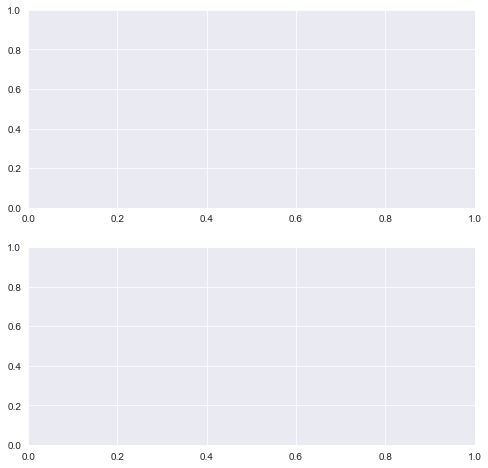

In [2]:
#Editable Variables
#list of test filters
zerosperrow = [0.9, 0.5, 0.3]
for z in zerosperrow:
    multi_files = True  #set to false if you just want to set one  prot_abund_file
    in_dir = "Input_data/Proteomic data/Abundance2/"
    prot_abund_file = 'Input_data/Proteomic data/Abundance2/Norm_Intensity _all20230403.xlsx'
    NP_filepath = 'Input_data/NPs/NP_Database.xlsx'
    controls_file = 'Input_data/Proteomic data/controls_combined.xlsx'
    uniprot_filepath = 'Input_data/BioPython_data/Combined_biopyCalcs.xlsx'
    NSPfilePath = 'Input_data/NetSurfP_data/Combined.xlsx'
    id = 'all_NoCon_RFE40_droprows' + str(z) + 'zeros'
    RFE_Feats = 40
    model = RandomForestRegressor(n_estimators=150)
    # take files in_dir and combine then into one pandas df (raw_MS_data) ###USE when combining multiple datasets####
    # melt the df to make it an accession number, NPUNID, Abundance dataset before combining
    files = os.listdir(in_dir)
    if multi_files == True:
        for i, f in enumerate(files):
            if i == 0:
                raw_MS_data = pd.read_excel(in_dir + f, header=0)
                cols = raw_MS_data.shape[1]
                cutoff = int(z * cols)
                print('shape beofre dropping rows', raw_MS_data.shape)
                raw_MS_data = raw_MS_data.drop(raw_MS_data[(raw_MS_data == 0).sum(axis=1) >= cutoff].index)
                print('shape after dropping rows', raw_MS_data.shape)
                # print(raw_MS_data)
                raw_MS_data = pd.melt(raw_MS_data, id_vars=['Entry'], var_name='Sample_num', value_name='Abundance')

            else:

                temp = pd.read_excel(in_dir + f, header=0)
                cols = temp.shape[1]
                cutoff = int(z * cols)
                print('shape beofre dropping rows', raw_MS_data.shape)
                temp = temp.drop(temp[(temp == 0).sum(axis=1) >= cutoff].index)
                print('shape after dropping rows', raw_MS_data.shape)
                temp = pd.melt(temp, id_vars=['Entry'], var_name='Sample_num', value_name='Abundance')

                raw_MS_data = pd.concat([raw_MS_data, temp])

    else:
        raw_MS_data = pd.read_excel(prot_abund_file, header=0)
        cols = raw_MS_data.shape[1]
        cutoff = int(z * cols)
        print('shape beofre dropping rows', raw_MS_data.shape)
        raw_MS_data = raw_MS_data.drop(raw_MS_data[(raw_MS_data == 0).sum(axis=1) >= cutoff].index)
        print('shape after dropping rows', raw_MS_data.shape)
        raw_MS_data = pd.melt(raw_MS_data, id_vars=['Entry'], var_name='Sample_num', value_name='Abundance')
    #remove prots that were added due to merge
    raw_MS_data = raw_MS_data.dropna()
    ###Bring in controls (MS data for serums)##
    controls = pd.read_excel(controls_file, header=0)
    MS_data_controls = pd.merge(raw_MS_data, controls, how='left', on='Entry')
    ###Bring in Uniprot_data,NSPdata and NP data##
    uniprot_dat = pd.read_excel(uniprot_filepath, header=0)
    NSP_data = pd.read_excel(NSPfilePath)
    ###Bring in NP data and merge to get complete NP dataset###
    NPUNdata = pd.read_excel(NP_filepath, header=0, sheet_name='NPUNID')
    NPprop = pd.read_excel(NP_filepath, header=0, sheet_name='NP_Props')
    NPdata = pd.merge(NPUNdata, NPprop, how="left", on='NPID')
    NPdata.dropna(inplace=True)
    #calculate Enrichment
    #####MAYBE add binning here to keep negative results and improve capapbilities######
    # MS_data_controls['Enrichment']= np.log2(MS_data_controls['Abundance']/MS_data_controls['Abundance_Controls'])
    # MS_data=MS_data_controls.drop(columns=['Abundance','Abundance_Controls'])
    #keep abundance Controls
    # MS_data=MS_data_controls.drop(columns=['Abundance'])
    raw_prop_data = pd.merge(MS_data_controls, uniprot_dat.drop_duplicates(subset=['Entry']), how='left', on='Entry')
    Protein_data_complete = pd.merge(raw_prop_data, NSP_data.drop_duplicates(subset=['Entry']), how='left',
                                     on='Entry')  #merges netsurfp features and biopython features
    Protein_data_complete.fillna(0, inplace=True)
    #creates new column called asa_sum_normalized which is the asa_sum value divide by the mass of the protein
    for df in [Protein_data_complete]:
        for col in ['asa_sum']:
            df[col + '_normalized'] = df[col] / df['Mass']

    data_complete = pd.merge(Protein_data_complete, NPdata, how='inner', on='Sample_num')
    data_complete.drop(columns=['notes', 'Notes', 'NPUNID'], inplace=True)
    data_complete.fillna(0, inplace=True)
    data_complete = data_complete.replace([-np.inf], '-12')
    data_complete = data_complete.replace([np.inf], '12')
    #create ordinal variables
    # data_complete2=pd.get_dummies(data_complete, columns=['Core Material','Surface_Ligand'])
    le = LabelEncoder()
    data_complete['Core Material'] = le.fit_transform(data_complete['Core Material'])
    data_complete['Surface_Ligand'] = le.fit_transform(data_complete['Surface_Ligand'])

    #set labels (what we are trying to predict) as Enrichment column
    # labels=data_complete['Enrichment'].copy()
    label_abund = np.ravel(data_complete['Abundance'].copy())
    label_abund_df = pd.DataFrame(label_abund)
    # label_enrich=np.ravel(data_complete['Enrichment'].copy())
    #make it one dimenisional
    #drop qualitative, not neccessary, and label columns
    #create df without bonus NSP columns (remove total_exposed) There are too sets of features total_exposed and exposed_exposed
    to_drop = data_complete.filter(like='total_exposed_')
    data_complete.drop(columns=to_drop, inplace=True)
    df = data_complete.drop(
        ['Entry', 'Abundance', 'Sequence', 'NPID', 'Ligands', 'Protein Source', 'Sample_num', 'Unnamed: 5',
         'Raw_FileID'], axis=1)
    df.drop(columns=['Abundance_Controls'], inplace=True)

    # df.to_excel("Input_data/Save_files/df_"+id+".xlsx")
    # label_abund_df.to_excel("Input_data/Save_files/label_abund"+id+".xlsx",index=False)

    #Run PCA to seee how data differentiates#
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_std = scaler.fit_transform(df)
    pca = PCA(n_components=5)
    x_pca = pca.fit_transform(X_std)
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=label_abund, cmap='viridis')
    plt.colorbar()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.savefig('Output_data/PCA' + id + '.png')
    plt.close('all')
    #use recursive feature elimination with Random Forest Regression as the estimator to select top 45 important features
    step = 2
    estimator = RandomForestRegressor(n_estimators=100)
    selector = RFE(estimator, n_features_to_select=RFE_Feats, step=step)
    selector = selector.fit(df, label_abund)
    selector.support_
    ranking = selector.ranking_
    feat_list = selector.get_feature_names_out()
    df = df[feat_list]

    #run Recursive feature elimination with cross validation
    from sklearn.model_selection import KFold

    id2 = 'dropped_controlAbundance'
    step = 2
    min_feats = 5
    cv = KFold(n_splits=10)
    estimator = RandomForestRegressor(n_estimators=100)
    # estimator=Lasso(alpha=.05)
    selector = RFECV(estimator=estimator, cv=cv, scoring='r2', min_features_to_select=min_feats, step=step)
    selector = selector.fit(df, label_abund)
    selector.support_
    feat_list2 = selector.get_feature_names_out()
    selected_features = df.columns[selector.support_]
    df = df[feat_list2]
    # df.to_excel("Input_data/Save_files/df_RFECV"+id+id2+".xlsx")
    # rfecv_df=pd.DataFrame(selector.cv_results_)
    # rfecv_df.to_excel("Output_data/RFECV_results"+id+id2+".xlsx")
    # label_abund_df.to_excel("Input_data/Save_files/label_abund_all.xlsx")
    n_scores = len(selector.cv_results_["mean_test_score"])
    plt.close('all')
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test accuracy")
    x = range(1, n_scores + 1)
    y = selector.cv_results_["mean_test_score"]
    err = selector.cv_results_["std_test_score"]
    plt.plot(x, y, 'k-')
    plt.fill_between(x, y - err, y + err)
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.savefig('Output_data/RFECV' + id + '.png')
    plt.close('all')

    #Quality control
    scorer(df, label_abund, model, id, 10)
    scram_score(df, label_abund, model, id, 0.2)
    feat_drop(df, label_abund, model, id, 0.2)
print('done')


In [4]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_